# Desafío - Expansiones basales
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección
correspondiente.

## Descripción
* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de
materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales
con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas
compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la
superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere
estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las
medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-darkgrid')

In [25]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [26]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
* Los nombres de las variables son muy poco amigables, dado que contienen espacios,
paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar
las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución.
Decida si es necesario normalizarlos/escalarlos.

In [30]:
df.columns =['cement',
             'blast_furnace_slag',
             'fly_ash',
             'water',
             'superplasticizer',
             'coarse_aggregate',
             'fine_aggregate ',
             'age',
             'concrete_compressive']

In [31]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
blast_furnace_slag      1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
superplasticizer        1030 non-null float64
coarse_aggregate        1030 non-null float64
fine_aggregate          1030 non-null float64
age                     1030 non-null int64
concrete_compressive    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


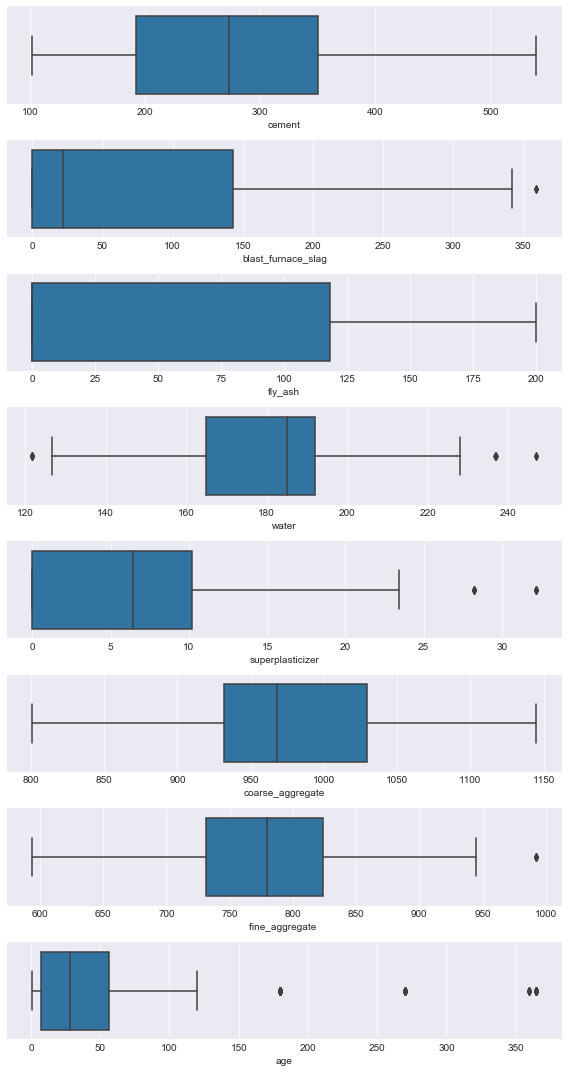

In [39]:
plt.rcParams['figure.figsize'] = (8,15)
fig, ax = plt.subplots(8, 1)
k = 0
for col in df.iloc[:, :-1].columns:
    sns.boxplot(df[col], ax=ax[k])
    k += 1
plt.tight_layout()

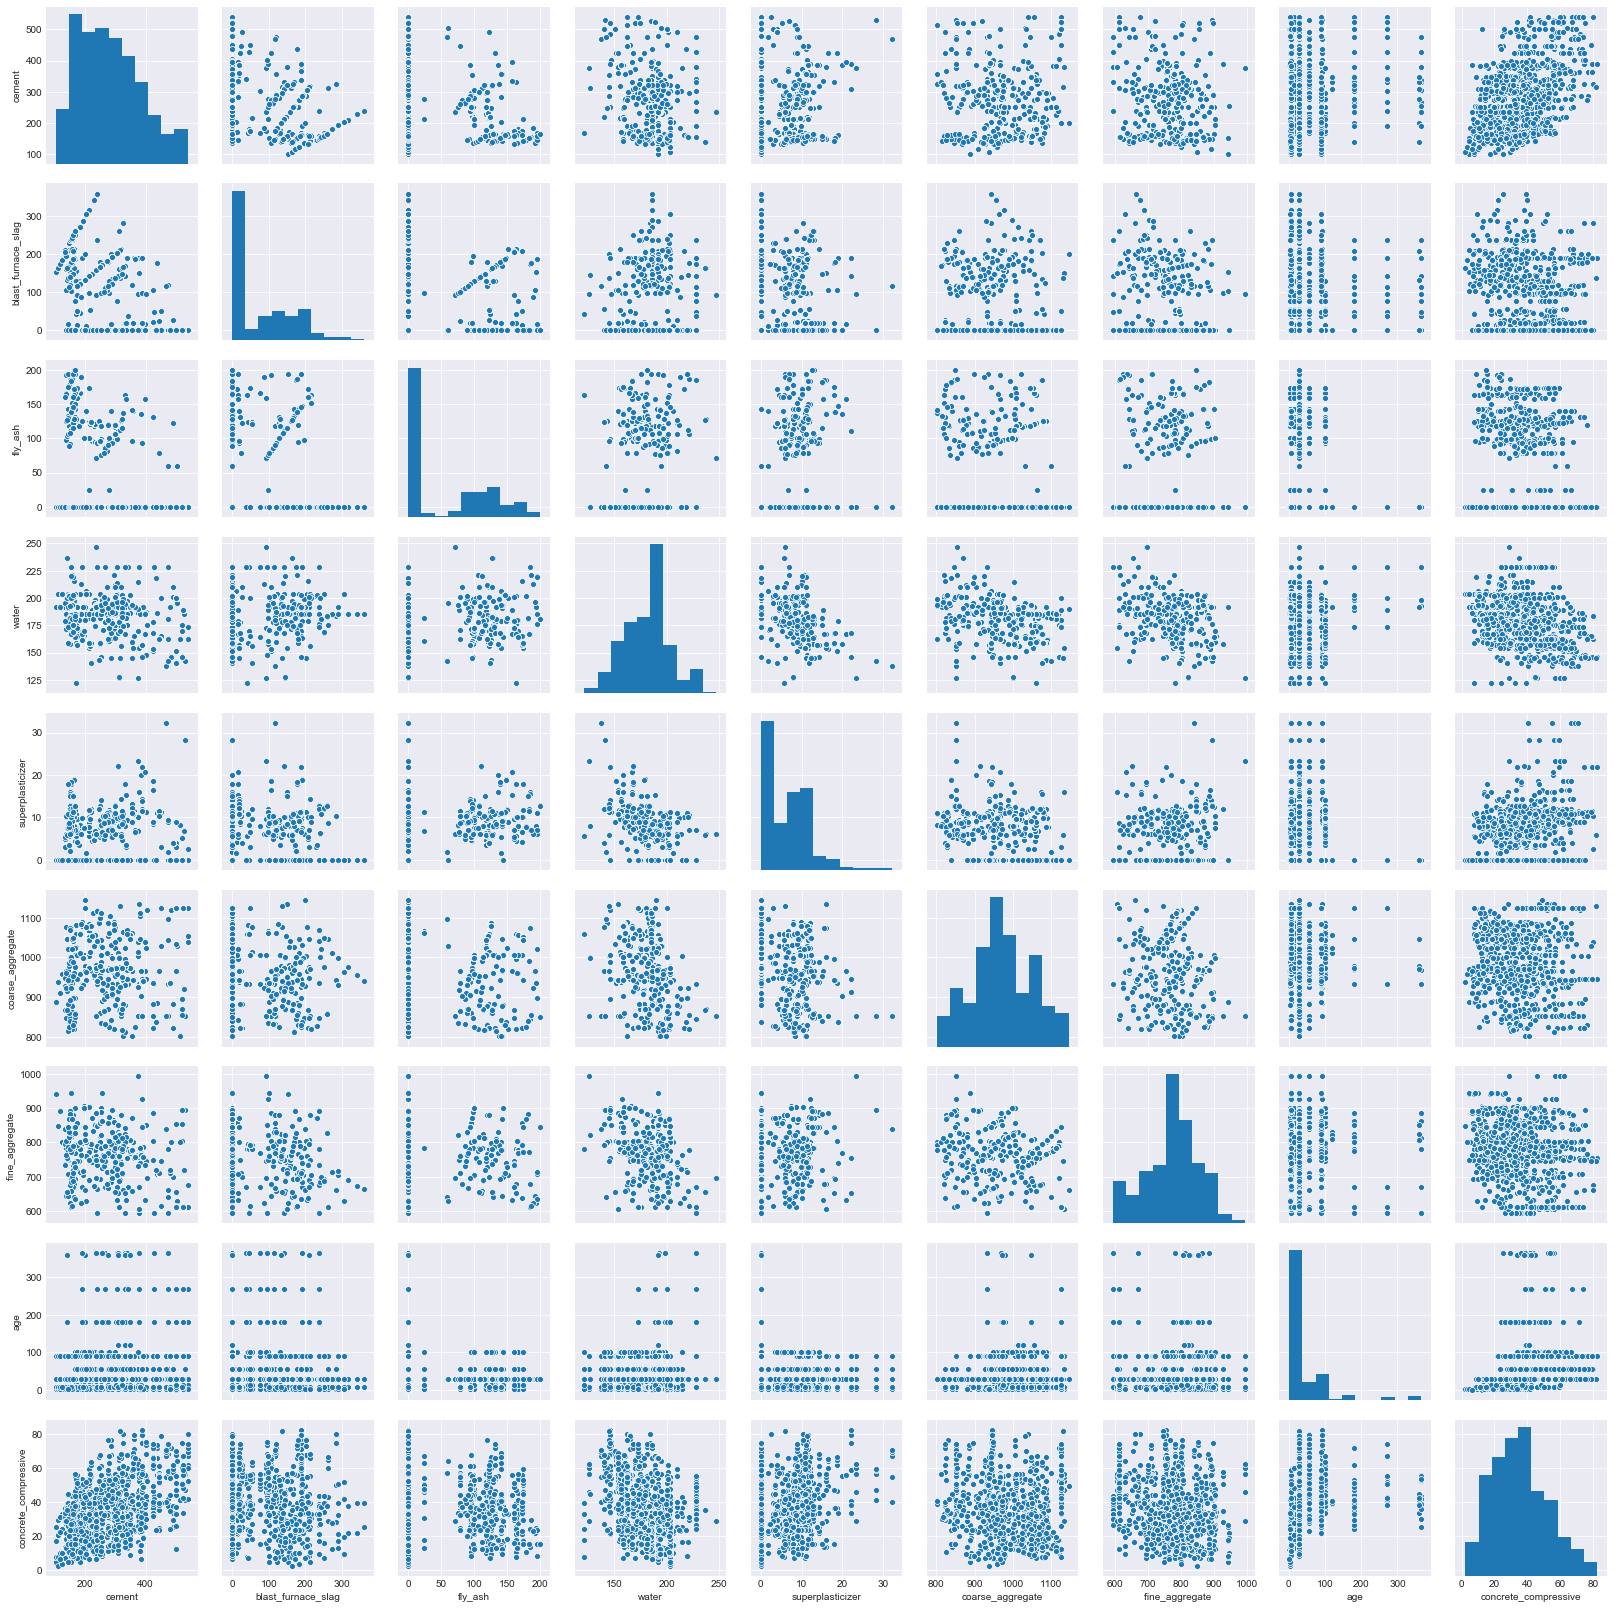

In [40]:
sns.pairplot(df)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.iloc[:, :-1].columns)

In [50]:
df_scaled['concrete_compressive'] = df['concrete_compressive']

In [51]:
df_scaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,79.99
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,61.89
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,40.27
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,41.05
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,44.30


## Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto,
importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch . Repórte el
hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y
3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño

In [54]:
from pygam import LinearGAM
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [67]:
X = df_scaled.iloc[:, 1:]
N = X.shape[0]
y = df_scaled['concrete_compressive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=63)

In [68]:
gam_one = LinearGAM()
gam_one.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=0.6, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

In [69]:
gam_one.lam

0.6

In [70]:
def report_metrics(model, X_test, y_test):
    print("Test R2 accuracy:", r2_score(model.predict(X_test), y_test))
    print("Test MSE accuracy:", mean_squared_error(model.predict(X_test), y_test))
    print("Test MAE accuracy:", median_absolute_error(model.predict(X_test), y_test))

In [72]:
report_metrics(gam_one, X_test, y_test)

Test R2 accuracy: 1.0
Test MSE accuracy: 7.664998052096985e-15
Test MAE accuracy: 4.804680386882865e-08


In [76]:
gam_two = LinearGAM(lam=np.logspace(-3,3)).gridsearch(X_train, y_train)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01/anaconda3/lib/python3.7/site-packa

In [77]:
gam_two.lam

1000.0

In [78]:
report_metrics(gam_two, X_test, y_test )

Test R2 accuracy: 1.0
Test MSE accuracy: 1.675876105868155e-15
Test MAE accuracy: 2.710371305170156e-08


En cuanto a R2, ambos modelos tienen un performance idéntico. Sin embargo en cuanto a MSE y MAE vemos que el modelo gam_two tiene un error menor. Esto puede deberse al valor de lamda, ya que su valor respecto del primero es muy superior (lamda = 1e3), lo que significa que se penaliza mas el modelo. El mejor modelo es gam_two.

## Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y
devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de
resistencia

In [94]:
from pygam.utils import generate_X_grid


def behaviors(model, X_train,):
    x_grid = generate_X_grid(model)
    attribute = X_train.columns
    cols = 1
    rows = int(len(attribute)/cols)
    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)
        partial_dep, confidence_intervals = model.partial_dependence(x_grid, feature = i+1, width=.95)
        plt.plot(x_grid[:,n], partial_dep, color='tomato')
        plt.fill_between(x_grid[:,n],
                         confidence_intervals[0][:,0],
                         confidence_intervals[0][:,1],
                         color='tomato', alpha=.25
                        )
        plt.title(attribute[n])
        plt.scatter(X_train[attribute[n]],
                   [plt.ylim()[0]]*len(X_train[attribute[n]]),
                    marker='|', alpha=.25
                   )
        plt.tight_layout()

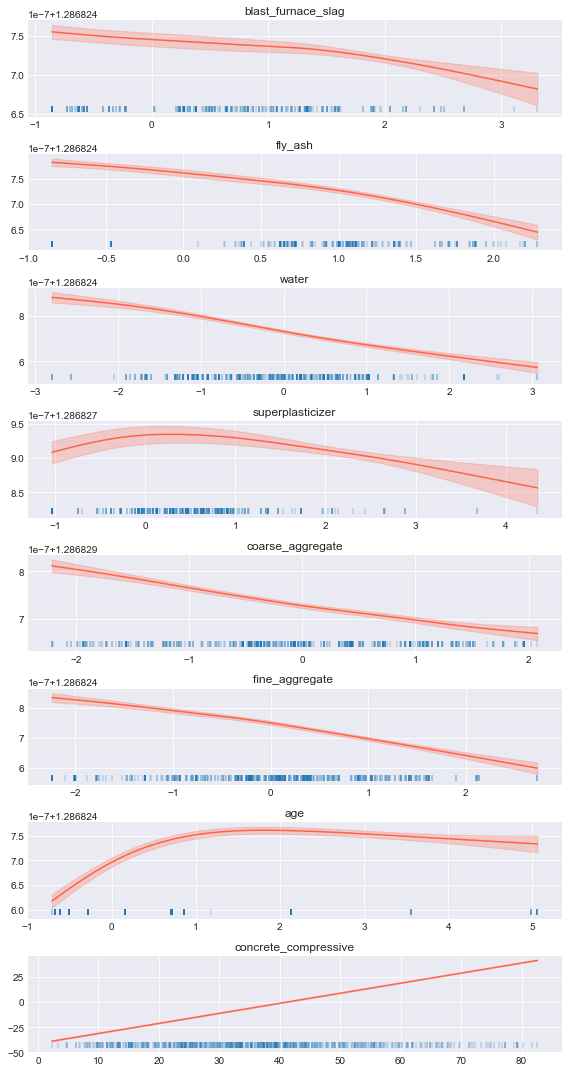

In [97]:
behaviors(gam_two, X_train)

En general podemos apreciar que la esperanza matemática de los valores predichos tienen un comportamiento decreciente en todos los atributos salvo la edad (age), que decrece a partir del año y medio de edad.